In [1]:
# numpy is a a standard python library that contains many helpful functions for doing basic mathematical operations.
# For more information, check the documentation at https://numpy.org/doc/stable/
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import scipy.stats as st
import pandas as pd

### Analysis of a Single Dice Throw

***Roll dice a number of times using a function to throw a 6-sided dice***

In [2]:
# ntrials is the number of dice rolls
ntrials = 20
trials = np.random.randint(low=1, high=6+1, size=ntrials)

***As a check, print all the trials***

In [3]:
print(trials)

[6 5 5 4 4 5 2 5 6 5 6 1 5 5 6 3 6 2 1 5]


***Plot the trials as a histogram (number of entries = ntrials)***

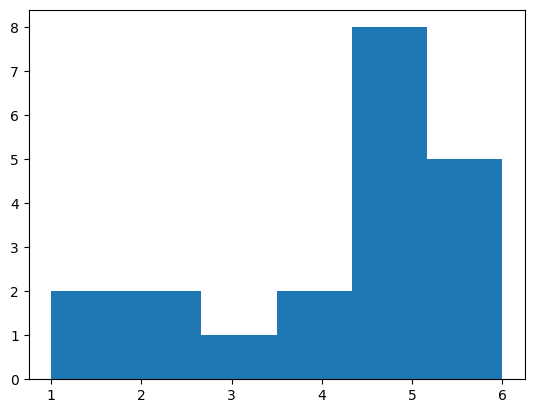

In [4]:
# now we plot trials in just 6 x-axis bins (one for each roll value) and look at the shape of the distributions
plt.hist(trials,bins=6)
plt.show()

**print the *average* of the trials, the *standard deviation*, the sum and the standard deviation calculated from first principles**

In [5]:
histmean = np.mean(trials) # mean
print(f'mean = {histmean:.3f}')
print(f'std dev (built-in function) = {np.std(trials):.3f}') # standard deviaion
print(f'std dev (calculated from deviations) = {np.sqrt(np.sum((trials-histmean)**2)/(ntrials-1)):.3f}') # brute force standard devation calculation

mean = 4.350
std dev (built-in function) = 1.621
std dev (calculated from deviations) = 1.663


**What is the theoretical standard deviation? It can be easily derived:** $\sigma = \sqrt{35/12}$

In [6]:
print(f'expected std dev = {np.sqrt(35/12):.3f}')
pred_std_dev = np.sqrt((1./6.)*((1-3.5)**2+(2-3.5)**2+(3-3.5)**2+(4-3.5)**2+(5-3.5)**2+(6-3.5)**2))
print(f'std dev (calculated from formula) = {pred_std_dev:.3f}') # brute force standard devation calculation

expected std dev = 1.708
std dev (calculated from formula) = 1.708


## Law of large numbers

Make sure to have a large number of trials for this next section!

In [7]:
means = np.array([np.mean(trials[:i+1]) for i in range(len(trials))])

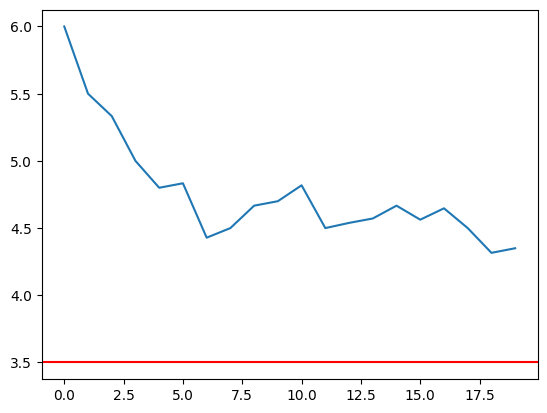

In [8]:
plt.plot(np.arange(len(trials)), means)
plt.axhline(3.5, color='red')
#plt.ylim([3.4,3.6])

This estimator is a good estimator in the sense that it converges to the mean of the *parent distribution*. If we did the same with our first guess for the standard deviation, the result has a slight bias which become smaller as one increases the number of samples.

In [9]:
stdevs = np.array([np.std(trials[:i+1]) for i in range(len(trials))])

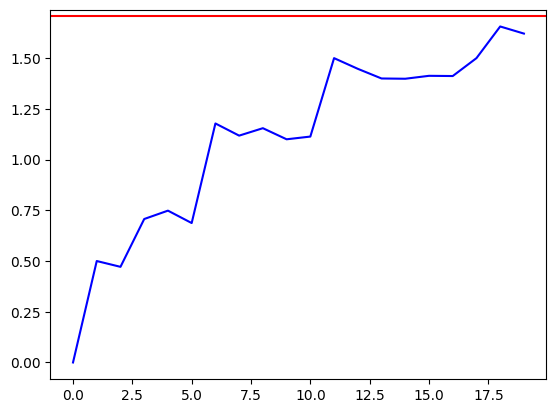

In [10]:
plt.plot(np.arange(len(trials)), stdevs, color='blue')
plt.axhline(np.sqrt(35/12), color='red')
#plt.ylim([1.6, 1.75])

### Analysis of a Multiple Dice Throw - The Central Limit Theorem

A function to throw multiple dice and return the average value

In [11]:
# define a function that rolls dice "ndice" times and returns the mean value
def ndicerollavg(ndice):
    dicetot = 0
    for i in range(ndice):
        dicetot += random.randint(1,6)
    return dicetot/ndice

**Roll multiple dice a number of times**

In [12]:
# load "ntrials" number of the average of "ndice"-dice rolls into "ndicetrials"
ndicetrials = np.array([])
ntrials = 20
ndice = 20
#for i in range(ntrials):
#    ndicetrials = np.append(ndicetrials,ndicerollavg(ndice))

In [13]:
ndicetrials = np.array([np.mean(np.random.randint(1,7,ndice)) for i in range(ntrials)])
print(ndicetrials)

[3.5  3.5  4.1  3.9  3.85 3.95 3.3  2.3  2.95 3.3  4.05 3.6  4.   3.6
 3.15 3.2  2.6  3.3  4.2  3.9 ]


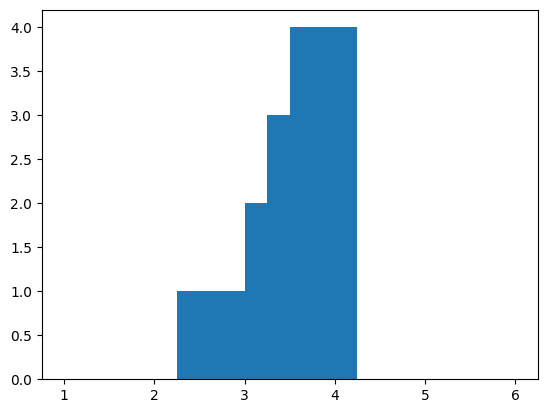

In [14]:
# print and histograms the trials
# print(ndicetrials)
plt.hist(ndicetrials,bins=20,range=(1,6))
plt.show()
#print(np.mean(ndicetrials),np.std(ndicetrials))

**Print the average, the standard deviation, sum and the brute force standard deviation formula**

In [15]:
histmean = np.mean(ndicetrials) # mean
print(f'mean = {histmean:.3f}')
print(f'std dev (built-in function) = {np.std(ndicetrials):.3f}') # standard deviation
print(f'std dev (calculated from deviations) = {np.sqrt(np.sum((ndicetrials-histmean)**2)/(ntrials-1)):.3f}') # brute force standard deviation calculation

mean = 3.513
std dev (built-in function) = 0.497
std dev (calculated from deviations) = 0.510


In [16]:
print(f'expected std dev = {np.sqrt(35/12/ndice):.3f}')

expected std dev = 0.382


The essence of the Central Limit Theorem is that when we consider a measurement which combines several samples of a *probability distribution* of arbitrary shape, the result is a **Normal** or a **Gaussian** distribution, which has 2 parameters: the mean $\bar{x}$ and the variance $\sigma^2$.

$$G(x;\bar{x},\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right]$$

The multiple dice throw follows the normal distribution with the same mean as the single dice throw and the variance is the single dice throw variance ($35/12$) divided by the number of dice:

In [17]:
#xdice = list(range(1,6,ntrials//2))
xdice = np.linspace(1, 6, num=21)
#print(xdice)
ydice = ntrials*0.25*st.norm.pdf(xdice,3.5,1.707825/np.sqrt(ndice))

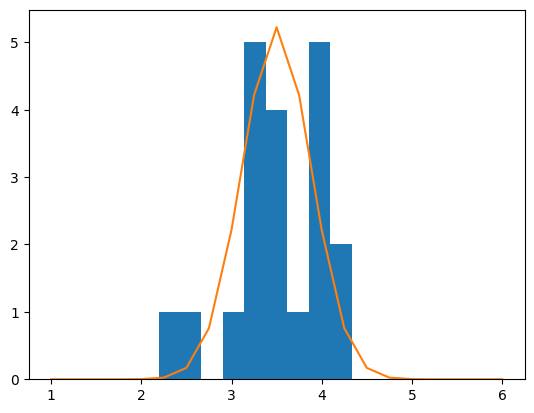

In [18]:
fig, ax = plt.subplots()
ax.hist(ndicetrials,bins=21,range=(1,6))
ax.plot(xdice,ydice)

### The Poisson Distribution

The Poisson probability function is:
$$f\left( k\right) =e^{-\mu }\dfrac {\mu ^{k}}{k!}$$
The mean and variance are both $\mu$

In [19]:
mean = 2

set a sensible range for plotting the distribution: $\pm 4\sigma$: $\sigma = \sqrt{\text{mean}}$

In [20]:
upperlim = mean + 4*math.sqrt(mean)
lowerlim = mean - 4*math.sqrt(mean)
iupperlim = math.trunc(upperlim)
ilowerlim = math.trunc(lowerlim)
if ilowerlim < 0:
    ilowerlim = 0
poissonprob = np.array([])
print(ilowerlim,iupperlim)

0 7


Generate the Poisson distribution function for that range

In [21]:
for i in range(ilowerlim,iupperlim+1):
    poissonprob = np.append(poissonprob,math.exp(-1*mean)*mean**i/math.factorial(i))
xrange = list(range(ilowerlim,iupperlim+1))
print(xrange)
print(poissonprob)

[0, 1, 2, 3, 4, 5, 6, 7]
[0.13533528 0.27067057 0.27067057 0.18044704 0.09022352 0.03608941
 0.0120298  0.00343709]


<BarContainer object of 8 artists>

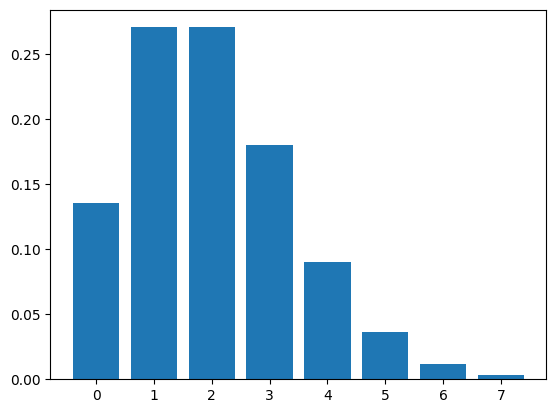

In [22]:
plt.xticks()
plt.bar(xrange, poissonprob)

We could have got the result above by simply using the Poisson function in Python $\tt{scipy.stats}$

<BarContainer object of 8 artists>

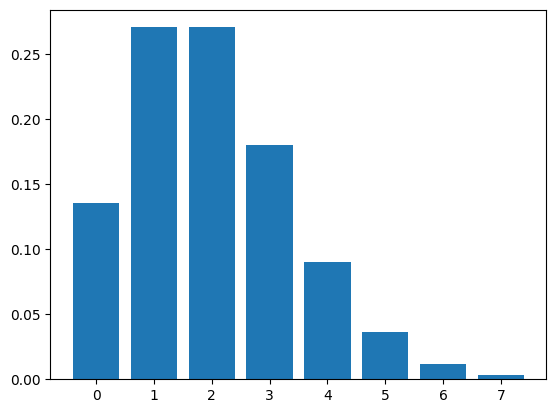

In [23]:
plt.bar(xrange, st.poisson.pmf(xrange, mean))

As the value of the mean gets larger than about 20, the probability distribution becomes virtually indistinguishable from a normal distribution with a standard deviation of $\sigma = \sqrt{\text{mean}}$

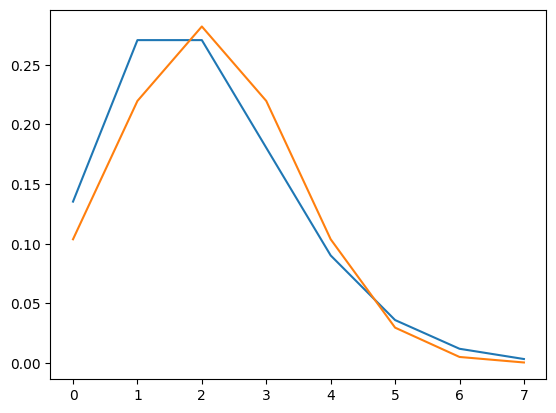

In [24]:
fig, ax = plt.subplots()
ax.plot(xrange, st.poisson.pmf(xrange, mean))
ax.plot(xrange,st.norm.pdf(xrange,mean,math.sqrt(mean)))

### The Gaussian distribution

Let us recap using a typical measurment that is supposed to follow a Gaussian parent distribution with a true value $\bar{x}=10$ (arbitrary units). If you measure this quantity, you will not find exactly 10. Hopefully, you will find some value close to 10. How close depends on the resolution of your experimental device, which ultimately determines the uncertainty associated to the measurement. Let's consider that this measurement has an uncertainty of $\sigma=2$. We will model the results of measurements as a Gaussian distribution.

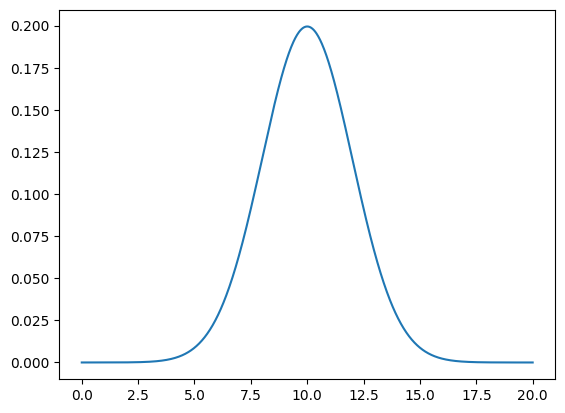

In [25]:
x = np.linspace(0, 20, 1000)
y = st.norm.pdf(x,10,2)
plt.plot(x,y)

The intuitive meaning of the mean is quite obvious (we will see a formal definition below). For the standard deviation, one way of think about it, is the range $[\bar{x}-\sigma,\bar{x}+\sigma$] such that the area under the gaussian is approximately 68.3%

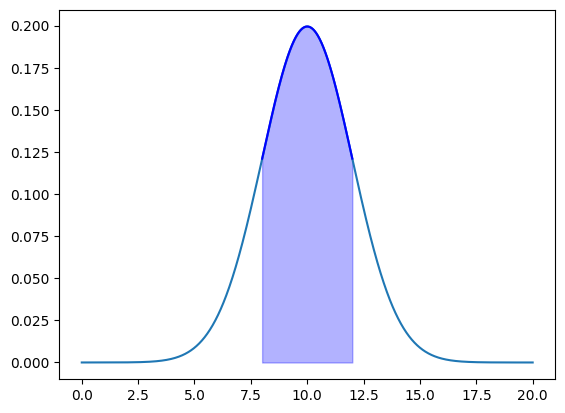

In [26]:
x_1 = np.arange(8, 12, 0.001)
y_1 = st.norm.pdf(x_1,10,2)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.plot(x_1,y_1, color='b')
ax.fill_between(x_1, y_1, 0, alpha=0.3, color='b')

To mimic a limited number of measurements, we essentially draw random numbers following this probability distribution.

Now the nature of the uncertainty ($\sigma=2$) and of the true value ($\bar{x}=10$) are clear.

It is not difficult to show that these numbers actually correspond to the *mean* and *standard deviation* of the probability distribution, which are defined as:

$$\bar{x} = \int xp(x)\, dx$$

and

$$\sigma = \sqrt{\int (x-\bar{x})^2p(x)\, dx}$$

But would there be a way to estimate these values without having to repeat the experiment that many times? Yes, there is! There are *estimators*, that approximate the values of these numbers as the number of repetitions increase.

The estimator of the mean is the average:

$$\frac{1}{N}\sum_{i=1}^N x_i$$



As one makes more and more measurements, the measured mean "converges" to the "true" value

The commonly used estimate for the standard deviation is:

$$\sigma = \sqrt{\frac{1}{N-1}\sum_{i=1}^N \left[x_i-\left(\frac{1}{N}\sum_{j=1}^N x_j\right)\right]^2}$$

The standard deviation of a gaussian is commonly used to describe uncertainties.

### Error propagation

#### Addition or subtraction of independent variables

Before we close, let's study the topic of propagation of uncertainties. That's when the quantity of interest $C$ is obtained as a function of two other random variables, $A$ and $B$, that we do measure, i.e. $C = f(A,B)$. We will limit ourselves here to Gaussian parent distributions for $A$ and $B$.

Here, we generate two samples each with 5000 single-value measurements drawn from the same Gaussian distribution with mean $\bar{x}=10$ and width $\sigma=2$.

In [27]:
dfA = pd.DataFrame(10+2*np.random.randn(1,5000), columns=(['expA_%d'%i for i in range(5000)]))
dfB = pd.DataFrame(10+2*np.random.randn(1,5000), columns=(['expB_%d'%i for i in range(5000)]))

A: mean = 10.030, std dev = 1.940
B: mean = 9.998, std dev = 1.993
C: mean = 20.028, std dev = 2.759


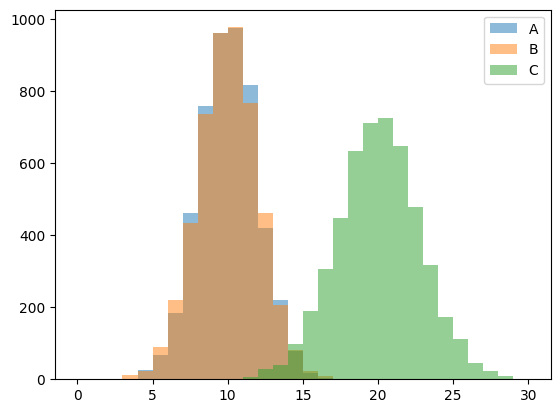

In [28]:
expA = np.array([])
expB = np.array([])
expC = np.array([])
for i in range(5000):
    expA = np.append(expA, dfA['expA_%d'%i])
    expB = np.append(expB, dfB['expB_%d'%i])
    expC = np.append(expC, dfA['expA_%d'%i] + dfB['expB_%d'%i])
print(f'A: mean = {expA.mean():.3f}, std dev = {expA.std():.3f}')
print(f'B: mean = {expB.mean():.3f}, std dev = {expB.std():.3f}')
print(f'C: mean = {expC.mean():.3f}, std dev = {expC.std():.3f}')
plt.hist(expA, bins=30, range=(0,30), alpha=0.5, label='A')
plt.hist(expB, bins=30, range=(0,30), alpha=0.5, label='B')
plt.hist(expC, bins=30, range=(0,30), alpha=0.5, label='C')
plt.legend()
plt.show()

First, let's consider that C corresponds to the sum of variables A and B, i.e. $C = A + B$. The relationship between the variances for the three variables is

$$\sigma_C^2 = \sigma_A^2 + \sigma_B^2$$

so $\sigma_C^2 = 4 + 4 = 8 \Rightarrow \sigma_C = 2.828$. We can estimate the derived standard deviation from the estimate of the $\sigma_A$ and $\sigma_B$.

NOTE: The propagation of errors in the case of a subtraction $C = A - B$ follows the same calculation.

In [29]:
print( f'Propagated uncertainty = {np.sqrt( expA.std()*expA.std() + expB.std()*expB.std() ):.3f}' )

Propagated uncertainty = 2.781


#### Multiplication or division of independent variables

Second, let's consider the ratio, i.e. $C=A/B$.

A: mean = 9.982, std dev = 2.009
B: mean = 9.986, std dev = 1.969
C: mean = 1.044, std dev = 0.319


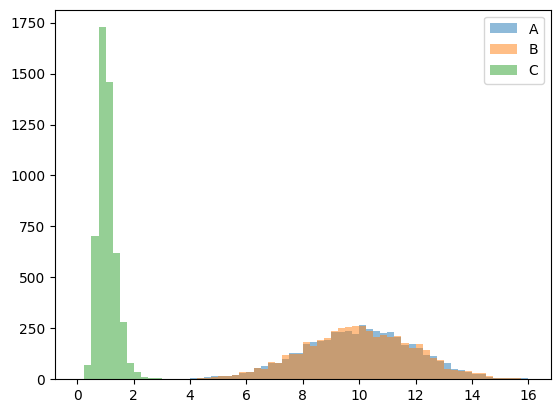

In [30]:
dfA = pd.DataFrame(10+2*np.random.randn(1,5000), columns=(['expA_%d'%i for i in range(5000)]))
dfB = pd.DataFrame(10+2*np.random.randn(1,5000), columns=(['expB_%d'%i for i in range(5000)]))
expA = np.array([])
expB = np.array([])
expC = np.array([])
for i in range(5000):
    expA = np.append(expA, dfA['expA_%d'%i])
    expB = np.append(expB, dfB['expB_%d'%i])
    expC = np.append(expC, dfA['expA_%d'%i] / dfB['expB_%d'%i])
print(f'A: mean = {expA.mean():.3f}, std dev = {expA.std():.3f}')
print(f'B: mean = {expB.mean():.3f}, std dev = {expB.std():.3f}')
print(f'C: mean = {expC.mean():.3f}, std dev = {expC.std():.3f}')
plt.hist(expA, bins=64, range=(0,16), alpha=0.5, label='A')
plt.hist(expB, bins=64, range=(0,16), alpha=0.5, label='B')
plt.hist(expC, bins=64, range=(0,16), alpha=0.5, label='C')
plt.legend()
plt.show()


The formula in this case is more complicated, it is a function also of the mean values:

$$\sigma_C^2 = \bar{C}^2\left[\frac{\sigma_A^2}{\bar{A}^2} + \frac{\sigma_B^2}{\bar{B}^2}\right]$$

and in the case of division

$$\bar{C} = \frac{\bar{A}}{\bar{B}}$$

or in the case of multiplication

$$\bar{C} = \bar{A}\bar{B}$$

Therefore, in our case considering the ratio between $A$ and $B$, we have

$$\sigma_C^2 = 1^2\left[\frac{2^2}{10^2} + \frac{2^2}{10^2}\right] = 0.08 \Rightarrow \sigma_C = 0.283$$

Like before, experimentally, the best we can do is to use the estimators we saw before.


In [31]:
print( f'Propagated uncertainty = {(expA.mean()/expB.mean())*np.sqrt(expA.std()*expA.std()/(expA.mean()*expA.mean())+expB.std()*expB.std()/(expB.mean()*expB.mean())):.3f}' )

Propagated uncertainty = 0.282


#### Generic function of independent variables

The general formulae for a generic $C = f(A,B)$ are:

$$\bar{C}=f(\bar{A},\bar{B})$$

and

$$\sigma_C^2 = \left(\frac{\partial f}{\partial A}\right)^2\sigma^2_A+\left(\frac{\partial f}{\partial B}\right)^2\sigma^2_B$$

In an experiment, when we use the estimates for $\bar{A}$, $\bar{B}$, $\sigma_A$, and $\sigma_B$ this is called *error propagation*. You should read the generalization of these formulae for more variables in the textbook, chapter 4.

Calculate the uncertainty for the formula C=3A-B. Note this is a homework exercise that you should do in class.

